# 实验2 关联规则挖掘算法的Python实现

---

## 数据理解

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('lab2.csv')

In [3]:
data.head()

,Customer ID,Product ID,Amount
0,370,154,3
1,41,40,3
2,109,173,3
3,556,11,4
4,143,72,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Customer ID  2328 non-null   int64
 1   Product ID   2328 non-null   int64
 2   Amount       2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [5]:
data.describe()

,Customer ID,Product ID,Amount
count,2328.000000,2328.000000,2328.000000
mean,293.837199,89.935567,3.004296
std,166.420824,51.082693,1.413599
min,1.000000,1.000000,1.000000
25%,156.750000,45.000000,2.000000
50%,288.000000,91.000000,3.000000
75%,432.000000,134.000000,4.000000
max,593.000000,178.000000,5.000000


## mlxtend库

mlxtend的全称为'Machine Learning Library Extensions', 其中包含了用于关联规则挖掘的算法函数


In [6]:
# 导入Apriori,FP-Growth算法函数
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

In [7]:
# 以上函数的输入形式是事务为行, 0或1编码的项为列,所以需要调整数据集

data.drop('Amount', axis=1, inplace=True)
# 删除冗余的Amount数据

In [8]:
encoded_data = pd.get_dummies(data, columns = ['Product ID'] , prefix = 'Product')          
# 进行独热编码

In [9]:
encoded_data.head()

,Customer ID,Product_1,Product_2,Product_3,Product_4,Product_5,Product_6,Product_7,Product_8,Product_9,...,Product_169,Product_170,Product_171,Product_172,Product_173,Product_174,Product_175,Product_176,Product_177,Product_178
0,370,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,41,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,109,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,143,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
group_data = encoded_data.groupby('Customer ID').any()

In [11]:
group_data.head()

,Product_1,Product_2,Product_3,Product_4,Product_5,Product_6,Product_7,Product_8,Product_9,Product_10,...,Product_169,Product_170,Product_171,Product_172,Product_173,Product_174,Product_175,Product_176,Product_177,Product_178
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
group_data.describe()

,Product_1,Product_2,Product_3,Product_4,Product_5,Product_6,Product_7,Product_8,Product_9,Product_10,...,Product_169,Product_170,Product_171,Product_172,Product_173,Product_174,Product_175,Product_176,Product_177,Product_178
count,587,587,587,587,587,587,587,587,587,587,...,587,587,587,587,587,587,587,587,587,587
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,569,579,578,573,578,574,574,575,575,580,...,575,576,578,579,578,577,567,571,575,572


In [13]:
Apriori_frequent_items = apriori(group_data, use_colnames=True, min_support=0.006)
Apriori_frequent_items # 输出Apriori算法得到的频繁项集

,support,itemsets
0,0.030664,(Product_1)
1,0.013629,(Product_2)
2,0.015332,(Product_3)
3,0.023850,(Product_4)
4,0.015332,(Product_5)
...,...,...
175,0.027257,(Product_176)
176,0.020443,(Product_177)
177,0.025554,(Product_178)
178,0.006814,"(Product_79, Product_1)"


In [14]:
Apriori_rules = association_rules(Apriori_frequent_items, metric = 'lift', min_threshold = 2)
Apriori_rules # 输出Apriori算法得到的关联规则

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Product_79),(Product_1),0.032368,0.030664,0.006814,0.210526,6.865497,0.005822,1.227825,0.882923
1,(Product_1),(Product_79),0.030664,0.032368,0.006814,0.222222,6.865497,0.005822,1.244098,0.881371
2,(Product_18),(Product_151),0.025554,0.028961,0.006814,0.266667,9.207843,0.006074,1.324144,0.914773
3,(Product_151),(Product_18),0.028961,0.025554,0.006814,0.235294,9.207843,0.006074,1.274276,0.917982


In [15]:
FPgrowth_frequent_items = fpgrowth(group_data, use_colnames=True, min_support=0.006)
FPgrowth_frequent_items # 输出FP-Growth算法得到的频繁项集

,support,itemsets
0,0.027257,(Product_93)
1,0.023850,(Product_4)
2,0.020443,(Product_91)
3,0.018739,(Product_44)
4,0.018739,(Product_166)
...,...,...
175,0.022147,(Product_33)
176,0.011925,(Product_89)
177,0.013629,(Product_172)
178,0.006814,"(Product_18, Product_151)"


In [16]:
FPgrowth_rules = association_rules(FPgrowth_frequent_items, metric = 'lift', min_threshold = 2)
FPgrowth_rules # 输出FP-Growth算法得到的关联规则

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Product_18),(Product_151),0.025554,0.028961,0.006814,0.266667,9.207843,0.006074,1.324144,0.914773
1,(Product_151),(Product_18),0.028961,0.025554,0.006814,0.235294,9.207843,0.006074,1.274276,0.917982
2,(Product_79),(Product_1),0.032368,0.030664,0.006814,0.210526,6.865497,0.005822,1.227825,0.882923
3,(Product_1),(Product_79),0.030664,0.032368,0.006814,0.222222,6.865497,0.005822,1.244098,0.881371


### 比较两种算法的运行时间

In [17]:
import time
import matplotlib.pyplot as plt

In [18]:
def measure_time(func, min_support):
    start_time = time.time()
    for i in range(100):
        func(group_data, use_colnames=True, min_support=min_support)
    end_time = time.time()
    return end_time - start_time

In [19]:
# 最小支持度参数
min_support_values = [0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]

In [20]:
# 测量Apriori和FP-growth的运行时间
apriori_time = [measure_time(apriori, min_supp) for min_supp in min_support_values]
fpgrowth_time = [measure_time(fpgrowth, min_supp) for min_supp in min_support_values]

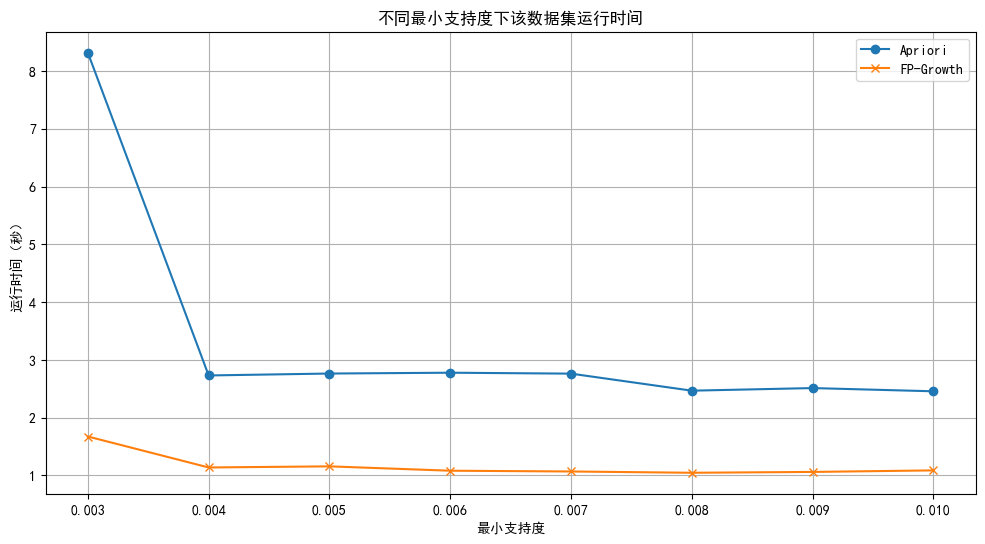

In [21]:
# 绘图
# 设置matplotlib使用中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
plt.figure(figsize=(12, 6))
plt.plot(min_support_values, apriori_time, marker='o', label='Apriori')
plt.plot(min_support_values, fpgrowth_time, marker='x', label='FP-Growth')
plt.title('不同最小支持度下该数据集运行时间')
plt.xlabel('最小支持度')
plt.ylabel('运行时间（秒）')
plt.legend()
plt.grid(True)
plt.show()